![title](http://data.freehdw.com/ships-titanic-vehicles-best.jpg)

# <div style="text-align: center" > A Statistical Analysis & Machine Learning Workflow of Titanic</div>
<div style="text-align: center"> Being a part of Kaggle gives me unlimited access to learn, share and grow as a data scientist. In this kernel, I want to solve <font color="red"><b>Titanic competition</b></font>, a popular machine learning dataset for **beginners.** I am going to share exactly how I work with a dataset step by step  <b>from data preparation, data analysis to implementing machine learning models.</b> I will also describe the model results along with many other tips. So let's get started.</div>


***
<div style="text-align:center"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b> at the end of this kernel. Any feedback/constructive criticism would be genuinely appreciated. **This notebook is always a work in progress. So, please stay tuned for more to come.**
</div>


<div style="text-align:center">If you like this notebook or find this notebook helpful, Please feel free to <font color="red"><b>UPVOTE</b></font> and/or leave a comment</div>

### <div style="text-align: center">Stay Tuned for More to Come!!
</div>

   

# Introduction
<a id="introduction" ></a>
***
This kernel is mostly for beginners, with detailed statistical analysis of  Titanic data set along with Machine learning models. I am super excited to share my first kernel with the Kaggle community, and I think my journey of data science can leap from this community.  As I go on in this journey and learn new topics, I will incorporate them with updates. So, check for them and please comment if you have any suggestions to make them better!! Going back to the topics of this kernel, I will do more in-depth visualizations to explain the data, and the machine learning models will be used to predict passenger survival status. So, let's get started.


## Table of contents
***
- [Introduction](#introduction)
- [Kernel Goals](#aboutthiskernel)
- [Part 1: Importing Necessary Modules](#import_libraries)
    - [1a. Libraries](#import_libraries)
    - [1b. Load datasets](#load_data)
    - [1c. A Glimpse of the dataset](#glimpse)
    - [1d. About this dataset](#aboutthisdataset)
    - [1e. Tableau Visualization](#tableau_visualization)
- [Part 2: Overview and Cleaning the Data](#scrubbingthedata)
    - [2a. Overview](#cleaningthedata)
    - [2b. Dealing with missing values](#dealwithnullvalues)
- [Part 3: Visualization and Feature Relations](#visualization_and_feature_relations)
    - [3a. Gender and Survived](#gender_and_survived)
    - [3b. Pclass and Survived](#pclass_and_survived)
    - [3c. Fare and Survived](#fare_and_survived)
    - [3d. Age and Survived](#age_and_survived)
    - [3e. Combined Feature relations](#combined_feature_relations)
- [Part 4: Statistical Overview](#statisticaloverview)
    - [4a. Correlation Matrix and Heatmap](#heatmap)
    - [4b. Statistical Test for Correlation](#statistical_test)
    - [4c. The T-Test](#t_test)
- [Part 5: Feature Engineering](#feature_engineering)
- [Part 6: Pre-Modeling Tasks](#pre_model_tasks)
    - [6a. Separating dependent and independent variables](#dependent_independent)
    - [6b. Splitting the training data](#split_training_data)
    - [6c. Feature Scaling](#feature_scaling)
- [Part 7: Modeling the Data](#modelingthedata)
    - [7a. Logistic Regression](#logistic_regression)
    - [7b. K-Nearest Neighbors(KNN)](#knn)
    - [7c. Gaussian Naive Bayes](#gaussian_naive)
    - [7d. Support Vector Machines](#svm)
    - [7e. Decision Tree Classifier](#decision_tree)
    - [7f. Bagging on Decision Tree Classifier](#bagging_decision)
    - [7g. Random Forest Classifier](#random_forest)
    - [7h. Gradient Boosting Classifier](#gradient_boosting)
    - [7i. XGBClassifier](#XGBClassifier)
    - [7j. AdaBoost Classifier](#adaboost)
    - [7k. Extra Tree Classifier](#extra_tree)
    - [7l. Gaussian Process Classifier](#GaussianProcessClassifier)
    - [7m. Voting Classifier](#voting_classifier)
- [Part 8: Submit Test Predictions](#submit_predictions)
    
- [ Credits](#credits)

# Kernel Goals
<a id="aboutthiskernel"></a>
***
There are two primary goals of this kernel.
- To do a statistical analysis of how some group of people was survived more than others. 
- To do an exploratory analysis of the dataset.  
- Use machine learning models to predict the chances of passengers survival.

# Part 1: Importing Necessary Libraries and datasets
***
<a id="import_libraries**"></a>
## 1a. Loading libraries
Python is an amazing language with many libraries. Let's import some of the necassary once. 


In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV



## Ignore warning
import warnings
warnings.filterwarnings('ignore')

## 1b. Loading datasets
<a id="load_data"></a>
***

After loading the necessary modules, we need to import the raw dataset. In the real business world, we get our data from many sources. However, we are going to work with the small dataset provided by Kaggle for this kernel. It's simple and sweet. 

In [3]:
## Importing the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

You are probably wondering why is there two datasets. That's because we use the first one to train our machine learning algorithms and the second one to test and see how well our algorithms are performing.

Once we have our data, we clean the data, for example: making sure that none of our data points have a null value, the types are same in both train and test dataset. In the data science field, we spend a tremendous amount of time cleaning the data. It is one of the most daunting parts of data science. However, it can also be a good experience for us to improve our coding skills.

## 1c. A Glimpse of the datasets. 
<a id="glimpse"></a>
***

**> *train* dataset**

In [4]:
## Take a look at the overview of the dataset. 
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


This is our train dataset. As you can see, the dataset needs a bit of cleaning. We will do that later. For now, lets find out more about this train dataset. 

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**> *test* dataset**

In [ ]:
test.head(10)

 ## 1d. About This Dataset
<a id="aboutthisdataset"></a>
***
The data has split into two groups:

- training set (train.csv)
- test set (test.csv)

***The training set includes our target variable(dependent variable), passenger survival status***(also known as the ground truth from the Titanic tragedy) along with other independent features like gender, class, fare, and Pclass. 

The test set should be used to see how well our model performs on unseen data. When we say unseen data, we mean that the algorithm or machine learning models have no relation to the test data. We do not want to use any part of the test data in any way to modify our algorithms; Which are the reasons why we clean our test data and train data separately. ***The test set does not provide passengers survival status***. We are going to use our model to predict passenger survival status.

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...

***
**Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Cabin**
   > - **Embarked**(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Sex**
            Female
            Male
- **Ordinal**(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
   > - **Pclass** (A proxy for socio-economic status (SES)) 
            1(Upper)
            2(Middle) 
            3(Lower)
***
**Numeric:**
- **Discrete**
  >  - **Passenger ID**(Unique identifing # for each passenger)
  >  - **SibSp**
  >  - **Parch**
  >  - **Survived** (Our outcome or dependent variable)
            0
            1
            
        
- **Continous**
>  - **Age**
>  - **Fare**
***
**Text Variable**
> - **Ticket** (Ticket number for passenger.)
> - **Name**(  Name of the passenger.) 



## 1e. Tableau visualization
<a id='tableau_visualization'></a>
***
I have incorporated a tableau visualization below of the training data. This visualization... 
* is for us to have an overview and play around with the dataset. 
* is done without making any changes(including Null values) to any features of the dataset.
***
Let's get a better perspective of the dataset through this visualization.


In [6]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

We want to see how the left bar(with green and red) changes when we filter out specific values. We can use multiple filters to see if there are any correlations among them. For example, if we click on **upper** and **Female** tab, we would see that green color dominates the bar with 91 survived female passengers with only three female passengers that did not survive. The age distribution chart on top provides us with some more info such as, what was the age range of those three unlucky females as the red color give away the unsurvived once. 

# Part 2: Overview and Cleaning the Data
<a id="cleaningthedata"></a>
***
## 2a. Overview

This dataset is almost clean. However, before we jump into EDA, lets analyze and see what we have here.

In [7]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId
## We will drop PassengerID and Ticket since it will be useless for our data. 
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

print (train.info())
print ("*"*40)
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float

It looks like, the features have unequal amount of data entries and they have many different types of variables. This can happen for the following reasons...
* We may have missing values in our features.
* We may have categorical features. 
* We may have alphanumerical or/and text features. 


## 2b. Dealing with Missing values
<a id="dealwithnullvalues"></a>
***
**Missing values in *train* dataset.**

In [8]:
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


**Missing values in *test* set.**

In [12]:
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Cabin,327,36.70
Age,86,9.65
Fare,1,0.11
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


We see that in both **train**, and **test** dataset have missing values. Let's make an effort to fill these missing values. 

### Embarked feature
***

In [13]:
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
## creating a df with the #
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))
## concating percent and total dataframe
pd.concat([total, percent], axis = 1, keys=['Total_per_group', 'Percent'])

,Total_per_group,Percent
,Embarked,Embarked
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


It looks like there are only two null values( ~ 0.22 %) in the Embarked feature, we can replace these with the mode value "S." 

**Let's see what are those two null values**

In [14]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws. Both passengers paid a fare of $80, are of Pclass 1 and female Sex. Let's see how the **Fare** is distributed among all **Pclass** and **Embarked** feature values

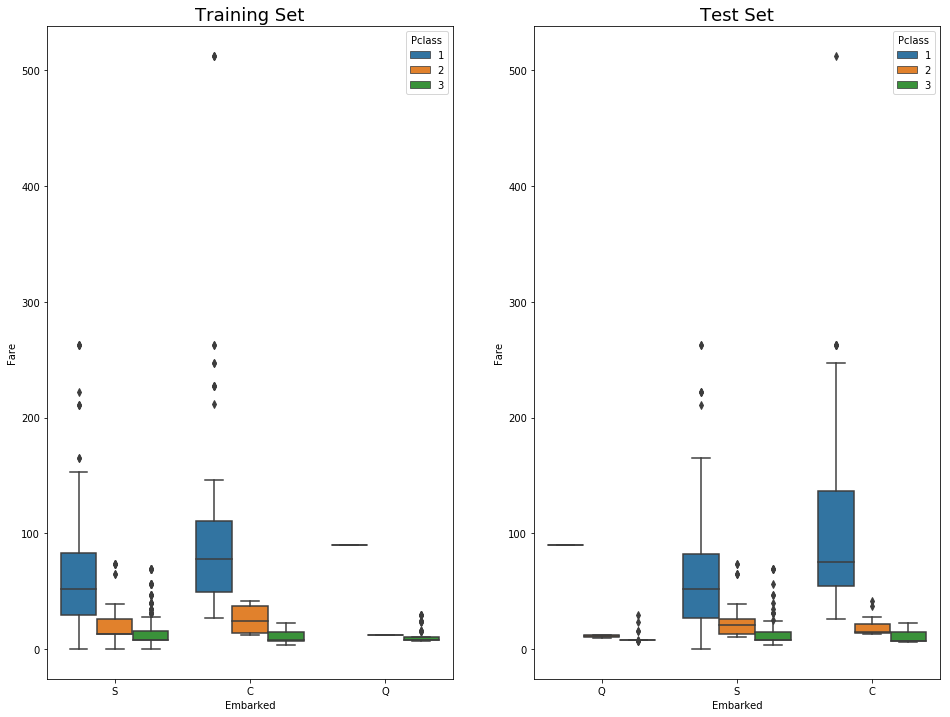

In [15]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

In [19]:
## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

### Cabin Feature
***


In [20]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. 
We have two choices, 
* we can either get rid of the whole feature, or 
* we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin records had a higher socio-economic-status then others. We may also say passengers with cabin records were more likely to be taken into consideration for the rescue mission. 

I think it's would be wise to keep the data. We will assign all the null values as **"N"**

In [21]:
## Assigning all the null values as "N"
train.Cabin.fillna("N", inplace=True)
test.Cabin.fillna("N", inplace=True)

All the cabin names start with an English alphabet following by digits. We can group these cabins by naming these cabins with that first alphabet. 

In [22]:
train.Cabin = [i[0] for i in train.Cabin]
test.Cabin = [i[0] for i in test.Cabin]

## Let's see the value counts now
pd.DataFrame(train.Cabin.value_counts())

,Cabin
N,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


### Fare Feature
***

In [23]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,N,S


Here, We can take the average of the **Fare** column with all the values to fill in for Nan Fare value. However, that might not be the best way to fill in this value. We can be a little more specific and take the average of the values where**Pclass** is ***3***, **Sex** is ***male*** and **Embarked** is ***S***

In [25]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

### Age Feature
***

In [26]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


Some standard approaches of dealing with null values are mean, median and mode. However, we will take a different approach since **~20% data in the Age column is missing** in both train and test dataset. It would be unwise to replace the missing values with median, mean or mode. We will use pythons library **fancyimpute** where we will use **K Nearest neighbors(KNN)** machine learning model to impute nearest neighbor value instead of  Null value. In order to run the fancyimpute we will first have to convert categorical variables into numerical variables. We will keep the age column unchanged for now and work on that in the feature engineering section. 

# Part 3. Visualization and Feature Relations
<a id="visualization_and_feature_relations" ></a>
***
Before we dive into finding relations between different features and our dependent variable(survivor) let us create some predictions about how the relations may turnout among features.

**Predictions:**
- Gender: More female survived than male
- Pclass: Higher socio-economic status passenger survived more than others. 
- Age: Younger passenger survived more than other passengers. 

Now, let's see how the features are related to each other by creating some visualizations. 



## 3a. Gender and Survived
<a id="gender_and_survived"></a>
***

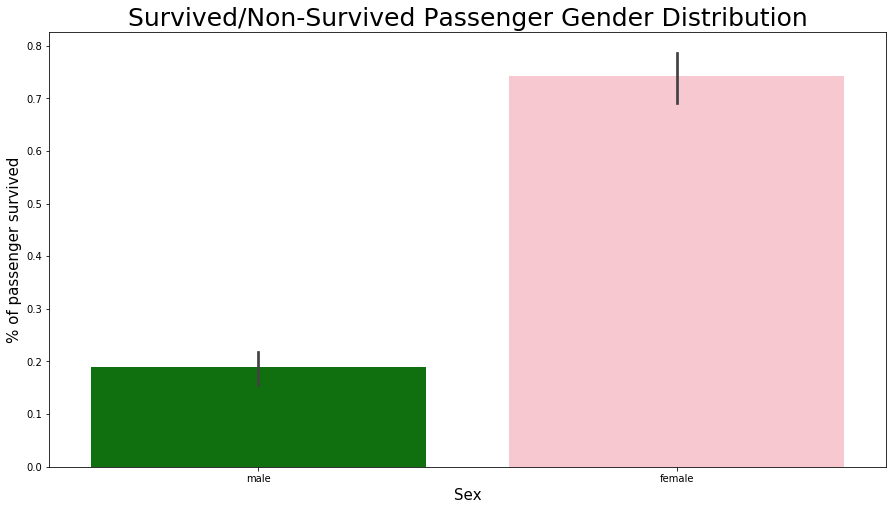

In [27]:
pal = {'male':"green", 'female':"Pink"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);



This bar plot above shows the distribution of female and male survived. The ***x_label*** represents **Sex** feature while the ***y_label*** represents the % of **passenger survived**. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

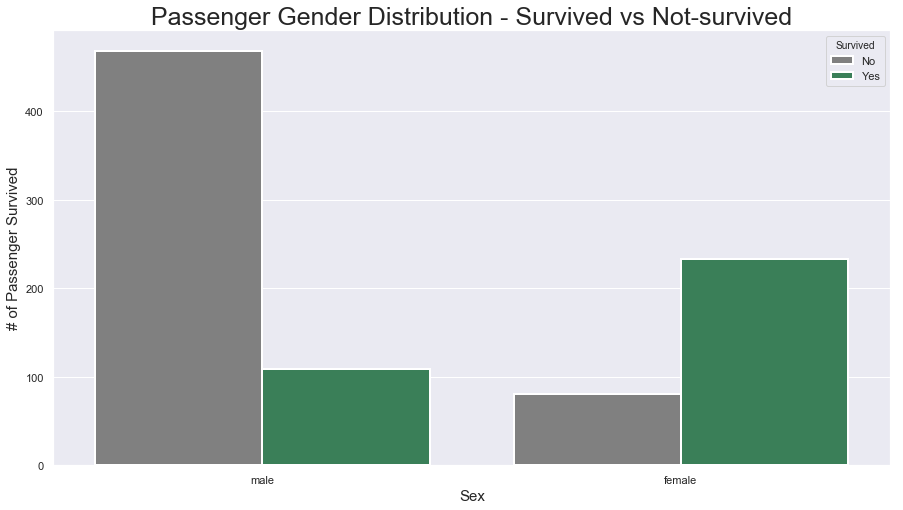

In [28]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive. 

**Summary**
***
- As we suspected, female passengers have survived at a much better rate than male passengers. 
- It seems about right since females and children were the priority. 

## 3b. Pclass and Survived
<a id="pcalss_and_survived"></a>
***

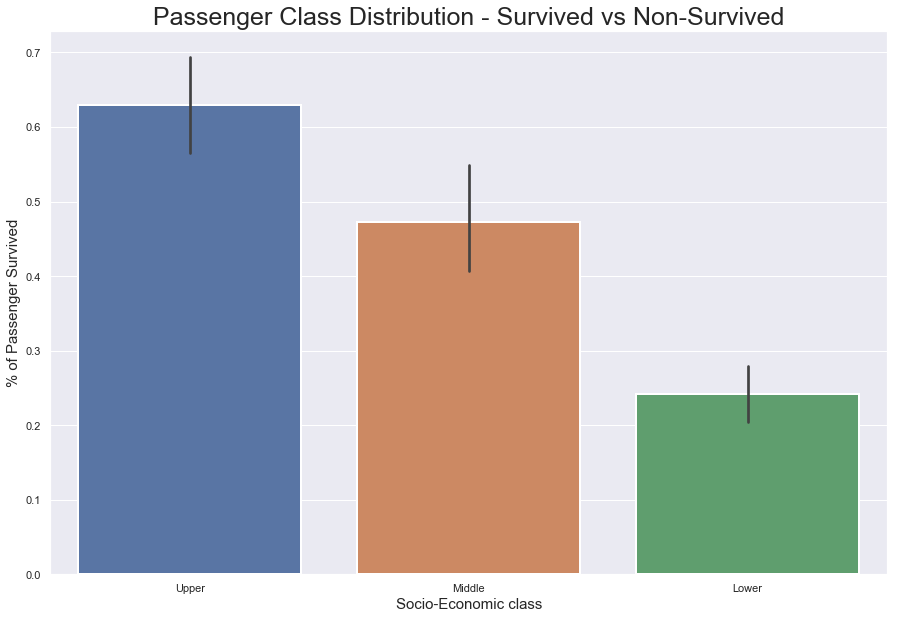

In [29]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

- It looks like ...
    - ~ 63% first class passenger survived titanic tragedy, while 
    - ~ 48% second class and 
    - ~ only  24% third class passenger survived. 



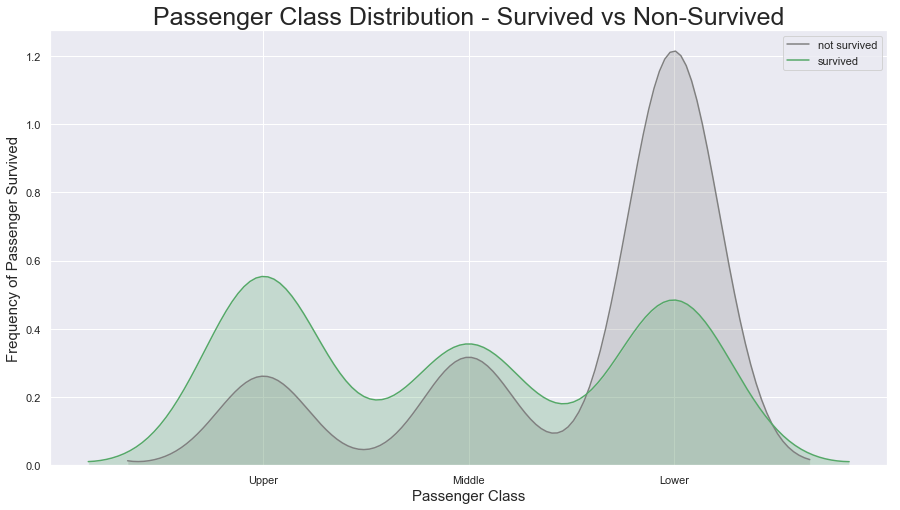

In [30]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

This KDE plot is pretty self-explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second. 

**Summary**
***
The first class passengers had the upper hand during the tragedy than second and third. You can probably agree with me more on this, in the next section of visualizations where we look at the distribution of ticket fare and survived column. 

## 3c. Fare and Survived
<a id="fare_and_survived"></a>
***

Text(0.5, 0, 'Fare')

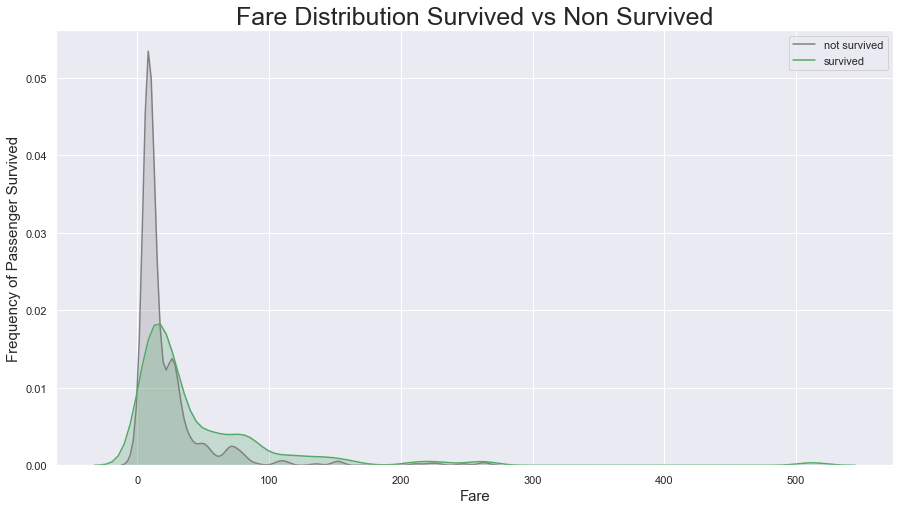

In [31]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)



This plot shows something impressive..
- The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive. 
- When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [32]:
train[train.Fare > 280]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,N,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now. 

## 3d. Age and Survived
<a id="age_and_survived"></a>
***

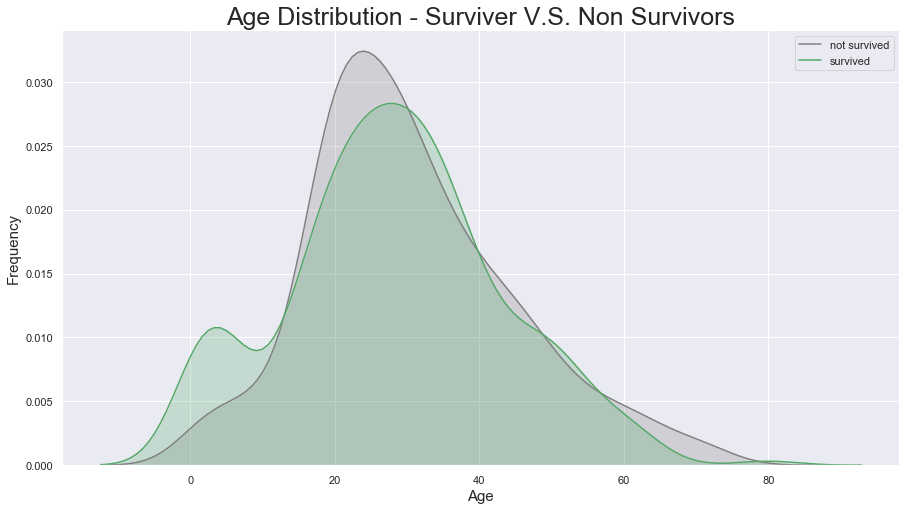

In [33]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It proves that children and infants were the priority, therefore, a good chunk of infant/children were saved. 

## 3e. Combined Feature Relations
<a id='combined_feature_relations'></a>
***
In this section, we are going to discover more than two feature relations in a single graph. I will try my best to illustrate most of the feature relations. Let's get to it. 

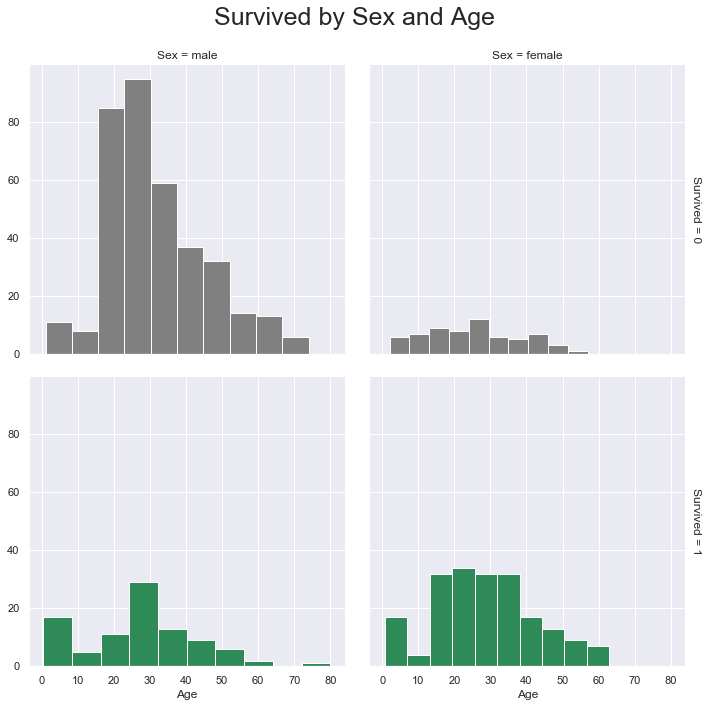

In [34]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


Facetgrid is a great way to visualize multiple variables and their relationships at once. From section 3a we have a bright idea of females being more of a priority then males. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

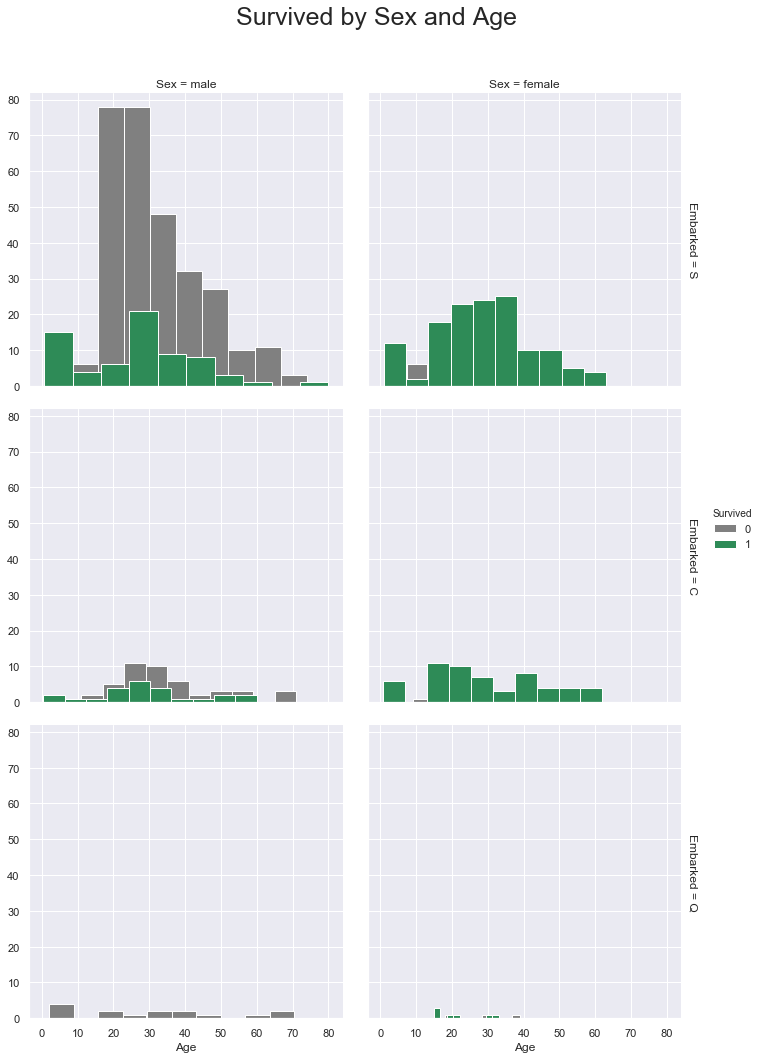

In [35]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are **Embarked, Age, Survived & Sex**. 
* The color illustrates passengers survival status(green represents survived, gray represents not survived)
* The column represents Sex(left being male, right stands for female)
* The row represents Embarked(from top to bottom: S, C, Q)
***
Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data. 
* Most passengers seem to be boarded on Southampton(S).
* More than 60% of the passengers died boarded on Southampton. 
* More than 60% of the passengers lived boarded on Cherbourg(C).
* Pretty much every male that boarded on Queenstown(Q) did not survive. 
* There were very few females boarded on Queenstown, however, most of them survived. 

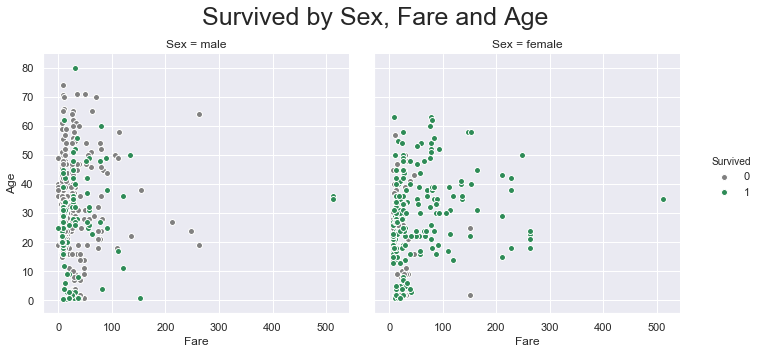

In [37]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

This grid unveils a couple of interesting insights. Let's find out.
* The facet grid above clearly demonstrates the three outliers with Fare of over \$500. At this point, I think we are quite confident that these outliers should be deleted.
* Most of the passengers were with in the Fare range of \$100. 

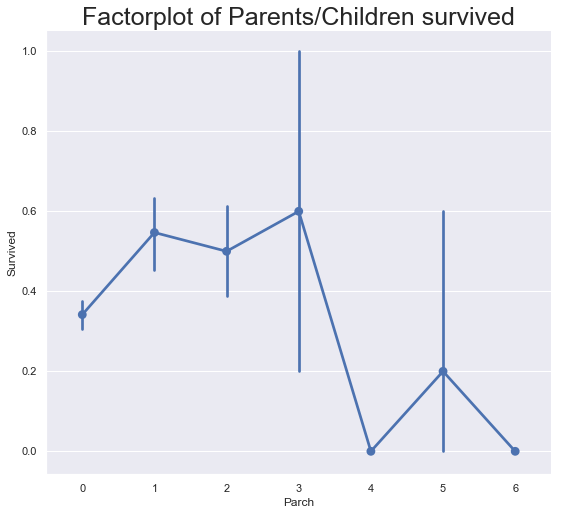

In [38]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

**Passenger who traveled in big groups with parents/children had less survival rate than other passengers.**

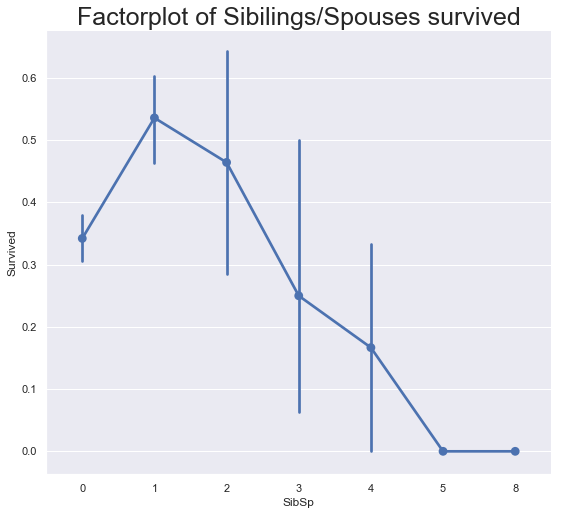

In [39]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

**While, passenger who traveled in small groups with sibilings/spouses had more survival rate than other passengers.**

In [40]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Part 4: Statistical Overview
<a id="statisticaloverview"></a>
***

![title](https://cdn-images-1.medium.com/max/400/1*hFJ-LI7IXcWpxSLtaC0dfg.png)

**Train info**

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
Survived    888 non-null int64
Pclass      888 non-null int64
Name        888 non-null object
Sex         888 non-null int64
Age         711 non-null float64
SibSp       888 non-null int64
Parch       888 non-null int64
Ticket      888 non-null object
Fare        888 non-null float64
Cabin       888 non-null object
Embarked    888 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 123.2+ KB


In [42]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [43]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,9,3
top,"Stoytcheff, Mr. Ilia",347082,N,S
freq,1,7,686,644


In [44]:
train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [45]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [46]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0.741214,2.162939,27.888462,0.696486,0.651757,42.985091
1,1,0.186087,2.394783,30.705477,0.431304,0.234783,23.830658


In [47]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
0,1,0.624413,0.563380,38.280984,0.422535,0.356808,78.124061
1,2,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
2,3,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550


I have gathered a small summary from the statistical overview above. Let's see what they are...
- This data set has 891 raw and 9 columns. 
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived. 
- ~63% first class passengers survived, while only 24% lower class passenger survived.



## 4a. Correlation Matrix and Heatmap
<a id="heatmap"></a>
***
### Correlations

In [48]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395


** Sex is the most important correlated feature with *Survived(dependent variable)* feature followed by Pclass.** 

In [49]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived    1.000000
Sex         0.298006
Pclass      0.111601
Fare        0.068509
Parch       0.006750
Age         0.006316
SibSp       0.001115
Name: Survived, dtype: float64

**Squaring the correlation feature gives us an amplified version of only positive correlation, which in turns makes it easy for us.**

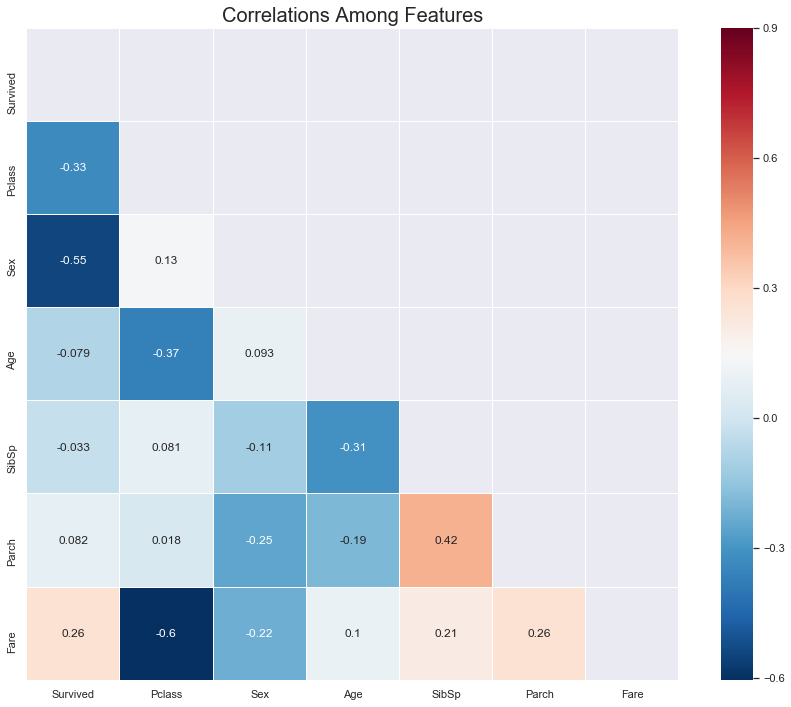

In [50]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

**

#### Positive Correlation Features:
- Fare and Survived: 0.26

#### Negative Correlation Features:
- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33


**So, Let's analyze these correlations a bit.** We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is. 

## 4b. Statistical Test for Correlation
<a id="statistical_test"></a>
***

Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of the tests and see how we are doing with our predictions.

###  Hypothesis Testing Outline

A hypothesis test compares the mean of a control group and experimental group and tries to find out whether the two sample means are different from each other and if they are different, how significant that difference is.
 
A **hypothesis test** usually consists of multiple parts: 

1. Formulate a well developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical tests. 
2. The null hypothesis ($H_0$) and Alternating hypothesis($H_1$):
> * The **null hypothesis($H_0$)** is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
> *  An **Alternative hypothesis($H_A$)** is a claim and the opposite of the null hypothesis.  It is a going against a status quo. In an alternative hypothesis, the observations show a real effect combined with a component of chance variation.
    
3. Determine the **test statistic**: test statistic can be used to assess the truth of the null hypothesis. Depending on the standard deviation we either use t-statistics or z-statistics. In addition to that, we want to identify whether the test is a one-tailed test or two-tailed test. 

4. Specify a **Significance level**: The significance level($\alpha$) is the probability of rejecting a null hypothesis when it is true. In other words, we are ***comfortable/confident*** with rejecting the null hypothesis a significant amount of times even though it is true. This significant amount is our significant level. In addition to that significance level is one minus our Confidence interval. For example, if we say, our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%. 

5. Compute the **T-statistics**: Computing the t-statistics follows a simple equation. This equation slightly differs depending on one sample test or two sample test  

6. Compute the **P-value**: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis was correct. The p-value is known to be unintuitive, and even many professors are known to explain it wrong. I think this [video](https://www.youtube.com/watch?v=E4KCfcVwzyw) explains the p-value really well. **The smaller the P-value, the stronger the evidence against the null hypothesis.**

7. **Describe the result and compare the p-value with the significance value($\alpha$)**: If p<= $\alpha$, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid. However if the p> $\alpha$, we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis simply because we are doing statistical test with sample data points.

We will follow each of these steps above to do your hypothesis testing below.

***

### Hypothesis testing
#### Formulating a well developed researched question: 
Regarding this dataset, we can formulate the null hypothesis and alternative hypothesis by asking the following questions. 
> * **Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?**. 
> * **Is there a significant difference in the survival rate between the male and female passengers?**
#### The Null Hypothesis and The Alternative Hypothesis
We can formulate our hypothesis by asking questions differently. However, it is essential to understand what our end goal is. Here our dependent variable or target variable is **Survived**. Therefore, we say

> ** Null Hypothesis($H_0$)** There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.  
>  ** Alternative Hypothesis($H_A$):** There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero. 

#### Determine the test statistics
> This will be a two tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. 
> Since we do not know the standard deviation($\sigma$) and n is small, we will use the t-distribution. 

#### Specify the significance level
> Specifying a significance level is an important step of the hypothesis test. It is an ultimate balance between type 1 error and type 2 error. We will discuss more indepth about those in another lesson. For now, we have decided to make our significance level($\alpha$) = 0.05. So, our confidence intervel or non-rejection region would be (1 - $\alpha$) =   95%. 

#### Computing T-statistics and P-value
Let's take a random sample and see the difference.
    
    

In [51]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


Now, we have to understand that those two means are not  **the population mean**.  *The population mean is a statistical term statistician uses to indicate the actual average of the entire group. The group can be any gathering of multiple numbers such as animal, human, plants, money, stocks.* For example, To find the age population mean of Bulgaria; we have to account for every single person's age and take their age. Which is almost impossible and if we were to go that route; there is no point of doing statistics in the first place. Therefore we approach this problem using sample sets. The idea of using sample set is that; if we take multiple samples of the same population and take the mean of them and put them in a distribution; eventually our distribution start to look more like a **normal distribution**. The more samples we take and the more sample means with be added and the closer the normal distribution with reach towards population mean. This is where **Central limit theory** comes from. We will go into this topic later on. 

Going back to our dataset, like we are saying these means above are part of the whole story. We were given part of the data to train our machine learning models, and the other part of the data was held back for testing. Therefore, It is impossible for us to know the population means of survival for male and females. Situation like this calls for a statistical approach. We will use the sampling distribution approach to do the test. let's take 50 random sample of male and female from our train data.

In [52]:
# separating male and female dataframe. 
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

# getting 50 random sample for male and female. 
import random
male_sample = random.sample(list(male['Survived']),50)
female_sample = random.sample(list(female['Survived']),50)

# Taking a sample means of survival feature from male and female
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)

# Print them out
print ("Male sample mean: " + str(male_sample_mean))
print ("Female sample mean: " + str(female_sample_mean))
print ("Difference between male and female sample mean: " + str(female_sample_mean - male_sample_mean))

Male sample mean: 0.22
Female sample mean: 0.68
Difference between male and female sample mean: 0.4600000000000001


According to the samples our male and female mean measured difference is 0.58, keeping in mind that...
* We randomly select 50 people to be in the male group and 50 people to be in the female group. 
* We know our sample is selected from a broader population(whole dataset of titanic). 
* We know we could have ended up with a different random sample of males or females from the total dataset. 
***
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **t-test** to evaluate that. When we perform a **t-test** we are usually trying to find out **an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).** 



The **t-statistics** is the measure of a degree to which our groups differ standardized by the variance of our measurements. In order words, it is basically the measure of signal over noise. Let us describe the previous sentence a bit more for clarification. I am going to use [this post](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen) as reference to describe the t-statistics here. 


#### Calculating the t-statistics
# $$t = \frac{\bar{x}-\mu}{\frac{S} {\sqrt{n}} }$$

Here..
* $\bar{x}$ is the sample mean. 
* $\mu$ is the hypothesized mean. 
* S is the standard devaition. 
* n is the sample size. 


Now, the denominator of this fraction $(\bar{x}-\mu)$ is basically the strength of the signal. where we calculate the difference between hypothesized mean and sample mean. If the mean difference is higher, then the signal is stronger. 

the numerator of this fraction ** ${S}/ {\sqrt{n}}$ ** calculates the amount of variation or noise of the data set. Here S is standard deviation, which tells us how much variation is there in the data. n is the sample size. 

So, according to the explanation above, the t-value or t-statistics is basically measures the strength of the signal(the difference) to the amount of noise(the variation) in the data and that is how we calculate the t-value in one sample t-test. However, in order to calculate between two sample population mean or in our case we will use the follow equation. 

# $$t = \frac{\bar{x}_M - \bar{x}_F}{\sqrt {s^2 (\frac{1}{n_M} + \frac{1}{n_F})}}$$

This equation may seem too complex, however, the idea behind these two are similar. Both of them have the concept of signal/noise. The only difference is that we replace our hypothesis mean with another sample mean and the two sample sizes repalce one sample size. 

Here..
* $\bar{x}_M$ is the mean of our male group sample measurements. 
* $ \bar{x}_F$ is the mean of female group samples. 
* $ n_M$ and $n_F$ are the sample number of observations in each group. 
* $ S^2$ is the sample variance.

It is good to have an understanding of what going on in the background. However, we will use **scipy.stats** to find the t-statistics. 


In [53]:
import scipy.stats as stats

print (stats.ttest_ind(male_sample, female_sample))
print ("This is the p-value when we break it into standard form: " + format(stats.ttest_ind(male_sample, female_sample).pvalue, '.32f'))

Ttest_indResult(statistic=-5.161423037281887, pvalue=1.283363304650417e-06)
This is the p-value when we break it into standard form: 0.00000128336330465041705856273340


#### Compare P-value with $\alpha$
> It looks like the p-value is very small compared to our significance level($\alpha$)of 0.05. Our observation sample is statistically significant. Therefore, our null hypothesis is ruled out, and our alternative hypothesis is valid, which is "**There is a significant difference in the survival rate between the male and female passengers."**

# Part 5: Feature Engineering
<a id="feature_engineering"></a>
***
In this section we are going to create a new features from the feature we already have. It is important to remember that we will create new features in such ways that will not cause **multicollinearity(when there is a relationship among independent variables)** to occur. 

## name_length
***

In [57]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a

In [58]:
train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [59]:
## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## title

In [60]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [61]:
train.title.value_counts()

 Mr              515
 Miss            181
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 the Countess      1
 Jonkheer          1
 Mme               1
 Sir               1
 Ms                1
 Lady              1
 Capt              1
 Don               1
Name: title, dtype: int64

In [63]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

## has_cabin

In [64]:
train["has_cabin"] = [0 if i == 'N'else 1 for i in train.Cabin]
test["has_cabin"] = [0 if i == 'N'else 1 for i in test.Cabin]

## Cabin feature

In [65]:
print (sorted(train.Cabin.unique()))
print (''.center(45,'*'))
print(sorted(test.Cabin.unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']
*********************************************
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N']


It looks like there is one more unique values in the training data. This will complicate running machine learning models. therefore when you create dummy variables, we will have to make sure to drop **T** column from training data. 

## child feature

In [66]:
## We are going to create a new feature "age" from the Age feature. 
train['child'] = [1 if i<16 else 0 for i in train.Age]
test['child'] = [1 if i<16 else 0 for i in test.Age]

In [67]:
train.child.value_counts()

0    805
1     83
Name: child, dtype: int64

## family_size feature


In [68]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [69]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [70]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

## is_alone feature

In [71]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

## Ticket feature

In [72]:
train.Ticket.value_counts().head(10)

347082          7
CA. 2343        7
1601            7
3101295         6
347088          6
CA 2144         6
382652          5
S.O.C. 14879    5
113781          4
2666            4
Name: Ticket, dtype: int64

## fare feature

### calculated_fare feature

In [73]:
## 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [74]:
train.calculated_fare.mean()

18.54129191972815

In [75]:
train.calculated_fare.mode()

0    13.0
dtype: float64

### fare_group

In [76]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a
        
    

In [77]:
train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

In [78]:
#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather  than the fare of individual passenger, therefore calculated fare will be much handy in this situation. 

## Creating dummy variables

In [81]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
train.drop(['Cabin_T', 'family_size','Ticket','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Ticket','Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

KeyError: "['title' 'Pclass' 'Cabin' 'Embarked' 'nLength_group' 'family_group'\n 'fare_group'] not in index"

## Age feature

In [82]:
pd.options.display.max_columns = 99
train.head()

,Survived,Sex,Age,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,1,22.0,1,0,0,0,0,3.62500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
1,1,0,38.0,1,0,1,0,0,35.64165,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,1,0,26.0,0,0,0,0,1,7.92500,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,1,0,35.0,1,0,1,0,0,26.55000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,0,1,35.0,0,0,0,0,1,8.05000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [85]:
front = train['Age']
train.drop(labels=['Age'], axis=1,inplace = True)
train.insert(0, 'Age', front)
train.head()

,Age,Survived,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.0,0,1,1,0,0,0,0,3.62500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
1,38.0,1,0,1,0,1,0,0,35.64165,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,26.0,1,0,0,0,0,0,1,7.92500,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,35.0,1,0,1,0,1,0,0,26.55000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,35.0,0,1,0,0,0,0,1,8.05000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [86]:
front = test['Age']
test.drop(labels=['Age'], axis=1,inplace = True)
test.insert(0, 'Age', front)
test.head()

,Age,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.5,1,0,0,0,0,1,7.829200,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0
1,47.0,0,1,0,0,0,0,3.500000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
2,62.0,1,0,0,0,0,1,9.687500,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
3,27.0,1,0,0,0,0,1,8.662500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
4,22.0,0,1,1,0,0,0,4.095833,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0


In [87]:
train.isnull().sum()

Age                     177
Survived                  0
Sex                       0
SibSp                     0
Parch                     0
has_cabin                 0
child                     0
is_alone                  0
calculated_fare           0
title_ Miss               0
title_ Mr                 0
title_ Mrs                0
title_ rare               0
Pclass_2                  0
Pclass_3                  0
Cabin_B                   0
Cabin_C                   0
Cabin_D                   0
Cabin_E                   0
Cabin_F                   0
Cabin_G                   0
Cabin_N                   0
Embarked_Q                0
Embarked_S                0
nLength_group_long        0
nLength_group_medium      0
nLength_group_short       0
family_group_loner        0
family_group_small        0
fare_group_high           0
fare_group_low            0
fare_group_mid            0
fare_group_very_high      0
dtype: int64

In [88]:
train.head()

,Age,Survived,Sex,SibSp,Parch,has_cabin,child,is_alone,calculated_fare,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_2,Pclass_3,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Embarked_Q,Embarked_S,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,22.0,0,1,1,0,0,0,0,3.62500,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
1,38.0,1,0,1,0,1,0,0,35.64165,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,26.0,1,0,0,0,0,0,1,7.92500,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,35.0,1,0,1,0,1,0,0,26.55000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,35.0,0,1,0,0,0,0,1,8.05000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [89]:
train.Age.fillna(train.Age.mean(), inplace=True)

In [90]:
test.Age.fillna(test.Age.mean(), inplace=True)

In [91]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        

In [92]:
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

In [93]:
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True)

In [94]:
"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

# Part 6: Pre-Modeling Tasks

## 6a. Separating dependent and independent variables
<a id="dependent_independent"></a>
***

In [95]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis=1)
y = train["Survived"]

In [96]:
#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

## 6b. Splitting the training data
<a id="split_training_data" ></a>
***


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 0)

## 6c. Feature Scaling
<a id="feature_scaling" ></a>
***


In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [100]:
test = sc.transform(test)

# Part 7: Modeling the Data
<a id="modelingthedata"></a>
***
I will train the data with the following models:
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Bagging on Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier



In [101]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

## 7a. Logistic Regression
<a id="logistic_regression"></a>
***

Let's run the logistic regression model first with out any hyper parameter tuning. 

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = x_train, y = y_train, cv = 10, n_jobs = -1)
logreg_accy = accuracies.mean()
print (round((logreg_accy),3))

0.829


In [103]:
#note: this is an alternative to train_test_split
##from sklearn import model_selection
##cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
##cv_results = model_selection.cross_validate(logreg, X,y, cv  = cv_split)

In [104]:
##print (cv_results)
##cv_results['train_score'].mean()

### Grid Search on Logistic Regression

In [105]:
C_vals = [0.099,0.1,0.2,0.5,12,13,14,15,16,16.5,17,17.5,18]
penalties = ['l1','l2']

param = {'penalty': penalties, 
         'C': C_vals 
        }
grid_search = GridSearchCV(estimator=logreg, 
                           param_grid = param,
                           scoring = 'accuracy', 
                           cv = 10
                          )

In [106]:
grid_search = grid_search.fit(x_train, y_train)

In [107]:
print (grid_search.best_params_)
print (grid_search.best_score_)

{'C': 0.2, 'penalty': 'l1'}
0.8417508417508418


In [108]:
logreg_grid = grid_search.best_estimator_

In [109]:
logreg_accy = logreg_grid.score(x_test, y_test)
logreg_accy

0.8061224489795918

In [110]:
print (classification_report(y_test, y_pred, labels=logreg_grid.classes_))
print (confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       177
           1       0.75      0.74      0.75       117

   micro avg       0.80      0.80      0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294

[[148  30]
 [ 29  87]]


0.8408421459268918


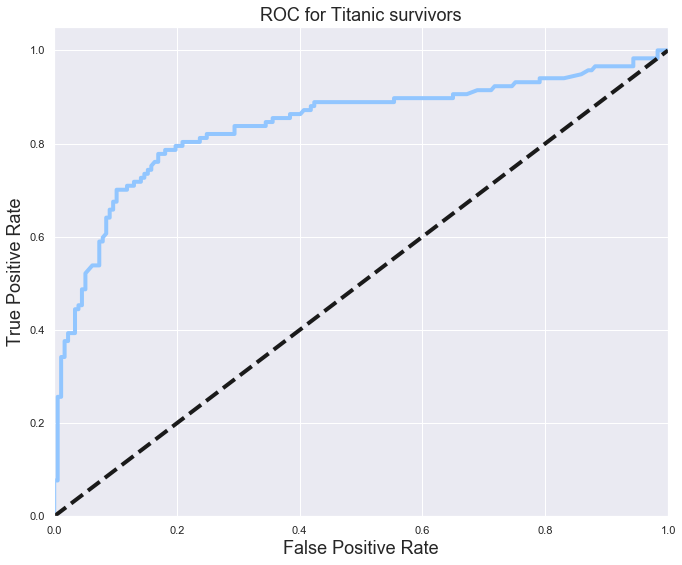

In [111]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-pastel')
y_score = logreg_grid.decision_function(x_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

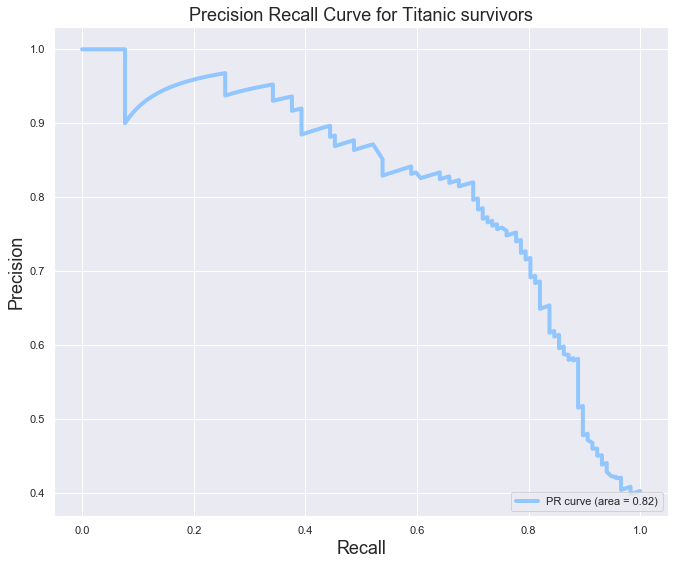

In [112]:
plt.style.use('seaborn-pastel')

y_score = logreg_grid.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## 7b. K-Nearest Neighbor classifier(KNN)
<a id="knn"></a>
***

[18, 0.7925170068027211]


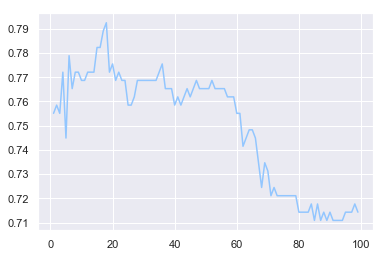

In [113]:
from sklearn.neighbors import KNeighborsClassifier
## choosing the best n_neighbors
nn_scores = []
best_prediction = [-1,-1]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p =2)
    knn.fit(x_train,y_train)
    score = accuracy_score(y_test, knn.predict(x_test))
    #print i, score
    if score > best_prediction[1]:
        best_prediction = [i, score]
    nn_scores.append(score)
    
print (best_prediction)
plt.plot(range(1,100),nn_scores)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
#n_neighbors: specifies how many neighbors will vote on the class
#weights: uniform weights indicate that all neighbors have the same weight while "distance" indicates
        # that points closest to the 
#metric and p: when distance is minkowski (the default) and p == 2 (the default), this is equivalent to the euclidean distance metric
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.765


### Grid search on KNN classifier

In [115]:
n_neighbors=[1,2,3,4,5,6,7,8,9,10]
weights=['uniform','distance']
param = {'n_neighbors':n_neighbors, 
         'weights':weights}
grid2 = GridSearchCV(knn, 
                     param,
                     verbose=False, 
                     cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True)
                    )
grid2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [116]:
print (grid2.best_params_)
print (grid2.best_score_)

{'n_neighbors': 5, 'weights': 'uniform'}
0.8063973063973064


In [117]:
## using grid search to fit the best model.
knn_grid = grid2.best_estimator_

In [118]:
##accuracy_score =(knn_grid.predict(x_test), y_test)
knn_accy = knn_grid.score(x_test, y_test)
knn_accy

0.7653061224489796

## 7c. Gaussian Naive Bayes
<a id="gaussian_naive"></a>
***

In [119]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.765


## 7d. Support Vector Machines
<a id="svm"></a>
***

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', probability=True, random_state = 1, C = 3)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

## 7e. Decision Tree Classifier
<a id="decision_tree"></a>
***

In [121]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)

0.731


### Grid search on Decision Tree

In [122]:
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
decisiontree_grid = GridSearchCV(dectree, 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
decisiontree_grid.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [123]:
print( decisiontree_grid.best_params_)
print (decisiontree_grid.best_score_)


{'criterion': 'entropy', 'max_depth': 8, 'max_features': 25}
0.8535353535353535


In [124]:
decisiontree_grid = decisiontree_grid.best_estimator_

In [125]:
decisiontree_grid.score(x_test, y_test)

0.7687074829931972

## 7f. Bagging Classifier
<a id="bagging"></a>
***

In [126]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(x_train, y_train)
y_pred = BaggingClassifier.predict(x_test)
bagging_accy = round(accuracy_score(y_pred, y_test), 3)
print(bagging_accy)

0.772


## 7g. Random Forest Classifier
<a id="random_forest"></a>

In [127]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_split=6, min_samples_leaf=4)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)

0.816


In [128]:
n_estimators = [100,120]
max_depth = range(1,30)



parameters = {'n_estimators':n_estimators, 
         'max_depth':max_depth, 
        }
randomforest_grid = GridSearchCV(randomforest,
                                 param_grid=parameters,
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                 n_jobs = -1
                                )

In [129]:
randomforest_grid.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 120], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
randomforest_grid.score(x_test, y_test)

0.8231292517006803

## 7h. Gradient Boosting Classifier
<a id="gradient_boosting"></a>
***

In [131]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)
y_pred = gradient.predict(x_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.813


## 7i. XGBClassifier
<a id="XGBClassifier"></a>
***

In [132]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(x_train, y_train)
y_pred = XGBClassifier.predict(x_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.799


## 7j. AdaBoost Classifier
<a id="adaboost"></a>
***

In [133]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
adaboost_accy = round(accuracy_score(y_pred, y_test), 3)
print(adaboost_accy)


0.793


## 7k. Extra Trees Classifier
<a id="extra_tree"></a>
***

In [135]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(x_train, y_train)
y_pred = ExtraTreesClassifier.predict(x_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)


0.772


## 7l. Gaussian Process Classifier
<a id="GaussianProcessClassifier"></a>
***

In [136]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(x_train, y_train)
y_pred = GaussianProcessClassifier.predict(x_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.765


## 7m. Voting Classifier
<a id="voting_classifer"></a>
***

In [137]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logreg_grid', logreg_grid),
    ('logreg',logreg), 
    ('svc', svc),
    ('random_forest', randomforest),
    ('gradient_boosting', gradient),
    ('decision_tree',dectree), 
    ('decision_tree_grid',decisiontree_grid), 
    ('knn',knn),
    ('knn_grid', knn_grid),
    ('XGB Classifier', XGBClassifier),
    ('BaggingClassifier', BaggingClassifier),
    ('ExtraTreesClassifier', ExtraTreesClassifier),
    ('gaussian',gaussian),
    ('gaussian process classifier', GaussianProcessClassifier)], voting='soft')

voting_classifier = voting_classifier.fit(x_train,y_train)

NameError: name 'svc' is not defined

In [138]:
y_pred = voting_classifier.predict(x_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

NameError: name 'voting_classifier' is not defined

In [139]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Gradient Boosting Classifier', 'Voting Classifier', 'XGB Classifier','ExtraTrees Classifier','Bagging Classifier'],
    'Score': [svc_accy, knn_accy, logreg_accy, 
              random_accy, gaussian_accy, dectree_accy,
               gradient_accy, voting_accy, XGBClassifier_accy, extraTree_accy, bagging_accy]})
models.sort_values(by='Score', ascending=False)

NameError: name 'svc_accy' is not defined

# Part 8: Submit test predictions
<a id="submit_predictions"></a>
***

In [ ]:
test_prediction = voting_classifier.predict(test)
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

# Credits

* To [Brandon Foltz](https://(www.youtube.com/channel/UCFrjdcImgcQVyFbK04MBEhA) for being an amazing statistics teacher. Love all those inspirational intro's. 
* To [Khan Academy](https://www.khanacademy.org), Amazing place to keep track of my mathematics journey. 
* To [General Assambly](https://generalassemb.ly); Where I started my data science journey. 

# Resources
Here are some of the links I found helpful while writing this kernel. I do not assume them all to be a great article; neighter do I recommend them. I have mentioned them, because I have found them helpful. 

## Statistics
* [What Is a t-test? And Why Is It Like Telling a Kid to Clean Up that Mess in the Kitchen?](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen)
* [What Are T Values and P Values in Statistics?](https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics)
* [What is p-value? How we decide on our confidence level.](https://www.youtube.com/watch?v=E4KCfcVwzyw)


***
If you like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:

**LinkedIn:** https://www.linkedin.com/in/masumrumi/ 

**My Website:** http://masumrumi.strikingly.com/ 

*** This kernel is a work in progress like all of my other notebooks. I will always incorporate new concepts of data science as I master them. This journey of learning is worth sharing as well as collaborating. Therefore any comments about further improvements would be genuinely appreciated.***
***
## If you have come this far, Congratulations!!

## If this notebook helped you in anyway, please upvote!!